# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Preparing the Data

In [3]:
df_train=pd.read_csv("train.csv")

In [4]:
df_test=pd.read_csv('test.csv')

In [5]:
df_train['source'] = 'train'
df_test['source'] = 'test'

In [6]:
df=pd.concat([df_train,df_test],ignore_index=True)

In [7]:
df.drop("ID",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               351037 non-null  object 
 1   Age                  351037 non-null  int64  
 2   Region_Code          351037 non-null  object 
 3   Occupation           351037 non-null  object 
 4   Channel_Code         351037 non-null  object 
 5   Vintage              351037 non-null  int64  
 6   Credit_Product       309190 non-null  object 
 7   Avg_Account_Balance  351037 non-null  int64  
 8   Is_Active            351037 non-null  object 
 9   Is_Lead              245725 non-null  float64
 10  source               351037 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 29.5+ MB


In [9]:
df.isnull().sum()

Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

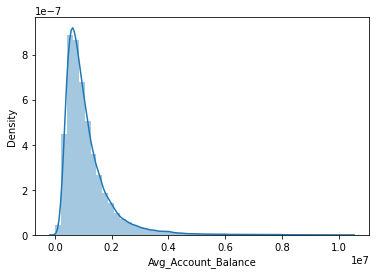

In [10]:
sns.distplot(df['Avg_Account_Balance'])
plt.show()

### Applying Log transformation to get the data to Normal Distribution

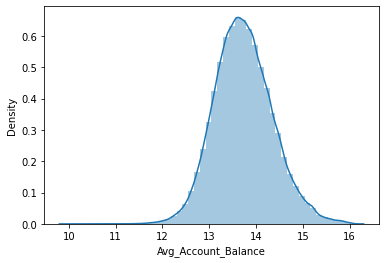

In [11]:
df['Avg_Account_Balance'] = np.log(df['Avg_Account_Balance'])
sns.distplot(df['Avg_Account_Balance'])
plt.show()

In [12]:
# data['Credit_Product'].replace(np.nan,'Yes',inplace=True)

#### Feature Engineering:

In [13]:
le = LabelEncoder()
var_mod = ['Gender','Region_Code','Is_Active']
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [14]:
df.isnull().sum()

Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [15]:
encoder1=ce.BinaryEncoder(cols='Occupation')

In [16]:
Occupation=encoder1.fit_transform(df['Occupation'])

In [17]:
df.drop('Occupation',inplace=True,axis=1)

In [18]:
df=pd.concat([df,pd.DataFrame(Occupation)],axis=1)

In [19]:
encoder2=ce.BinaryEncoder(cols='Channel_Code')

In [20]:
ChannelCode=encoder2.fit_transform(df['Channel_Code'])

In [21]:
df.drop('Channel_Code',inplace=True,axis=1)

In [22]:
df=pd.concat([df,pd.DataFrame(ChannelCode)],axis=1)

In [23]:
df['Credit_Product']=df['Credit_Product'].replace('Yes',1)

In [24]:
df['Credit_Product']=df['Credit_Product'].replace('No',0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               351037 non-null  int32  
 1   Age                  351037 non-null  int64  
 2   Region_Code          351037 non-null  int32  
 3   Vintage              351037 non-null  int64  
 4   Credit_Product       309190 non-null  float64
 5   Avg_Account_Balance  351037 non-null  float64
 6   Is_Active            351037 non-null  int32  
 7   Is_Lead              245725 non-null  float64
 8   source               351037 non-null  object 
 9   Occupation_0         351037 non-null  int64  
 10  Occupation_1         351037 non-null  int64  
 11  Occupation_2         351037 non-null  int64  
 12  Channel_Code_0       351037 non-null  int64  
 13  Channel_Code_1       351037 non-null  int64  
 14  Channel_Code_2       351037 non-null  int64  
dtypes: float64(3), in

In [26]:
df1=df[df.columns[[0,1,2,3,4,5,6,9,10,11,12,13,14,7,8]]]


#### Handling the missing values:

In [27]:
impute_it=IterativeImputer()

In [28]:
df1.iloc[:,0:9]=impute_it.fit_transform(df1.iloc[:,0:9])

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               351037 non-null  float64
 1   Age                  351037 non-null  float64
 2   Region_Code          351037 non-null  float64
 3   Vintage              351037 non-null  float64
 4   Credit_Product       351037 non-null  float64
 5   Avg_Account_Balance  351037 non-null  float64
 6   Is_Active            351037 non-null  float64
 7   Occupation_0         351037 non-null  float64
 8   Occupation_1         351037 non-null  float64
 9   Occupation_2         351037 non-null  int64  
 10  Channel_Code_0       351037 non-null  int64  
 11  Channel_Code_1       351037 non-null  int64  
 12  Channel_Code_2       351037 non-null  int64  
 13  Is_Lead              245725 non-null  float64
 14  source               351037 non-null  object 
dtypes: float64(10), i

In [30]:
train = df1.loc[df1['source']=="train"]
test = df1.loc[df1['source']=="test"]

In [31]:
test.drop(['Is_Lead','source'],axis=1,inplace=True)
train.drop('source',axis=1,inplace=True)

In [32]:
# Seperate Features and Target
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']

### Splitting into Training and Testing:

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

## GridSearchCV to find the best parameters:

In [513]:
param_grid={'num_leaves':[50,100,150,200,250],'objective':['binary'],'max_depth':[5,10,15,20,50],'learning_rate':[0.05,0.1,0.3,0.5,0.7],
           'max_bin':[20,50,100,150,200,300,500]}
grid_search_lgbm=GridSearchCV(lgb.LGBMClassifier(random_state=0),param_grid,return_train_score=True,n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.3, 0.5, 0.7],
                         'max_bin': [20, 50, 100, 150, 200, 300, 500],
                         'max_depth': [5, 10, 15, 20, 50],
                         'num_leaves': [50, 100, 150, 200, 250],
                         'objective': ['binary']},
             return_train_score=True)

In [514]:
print("Best parameters: {}".format(grid_search_lgbm.best_params_))

Best parameters: {'learning_rate': 0.1, 'max_bin': 200, 'max_depth': 5, 'num_leaves': 50, 'objective': 'binary'}


# Cross- Validation function( Stratified Cross Validation):

#### Used Stratified K-Fold because of the imbalance of categories in the data

In [34]:
def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

## CatBoosting:

In [458]:
Best_parameters= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [459]:
cat_model = cross_val(X, y, CatBoostClassifier, Best_parameters)

Fold: 0
0:	learn: 0.6559391	test: 0.6557898	best: 0.6557898 (0)	total: 215ms	remaining: 1h 11m 46s
400:	learn: 0.3410119	test: 0.3415302	best: 0.3415224 (393)	total: 23.3s	remaining: 18m 57s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3413531167
bestIteration = 680

Shrink model to first 681 iterations.
roc_auc_score: 0.8757489973060519
--------------------------------------------------
Fold: 1
0:	learn: 0.6558403	test: 0.6558315	best: 0.6558315 (0)	total: 54.2ms	remaining: 18m 3s
400:	learn: 0.3402431	test: 0.3477907	best: 0.3477867 (383)	total: 22.7s	remaining: 18m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3477710715
bestIteration = 478

Shrink model to first 479 iterations.
roc_auc_score: 0.8720415119846834
--------------------------------------------------
Fold: 2
0:	learn: 0.6558497	test: 0.6558090	best: 0.6558090 (0)	total: 59.5ms	remaining: 19m 50s
400:	learn: 0.3404654	test: 0.3461576	best: 0.3461484 (398)	total: 21.9s	rem

## XGBoosting:

In [48]:
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}

In [49]:
xgb_model = cross_val(X, y, XGBClassifier, xgb_params)

Fold: 0
[23:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68220
[400]	validation_0-logloss:0.38160
[800]	validation_0-logloss:0.35574
[1200]	validation_0-logloss:0.35014
[1600]	validation_0-logloss:0.34788
[2000]	validation_0-logloss:0.34686
[2400]	validation_0-logloss:0.34609
[2800]	validation_0-logloss:0.34558
[3200]	validation_0-logloss:0.34501
[3600]	validation_0-logloss:0.34468
[4000]	validation_0-logloss:0.34443
[4400]	validation_0-logloss:0.34408
[4800]	validation_0-logloss:0.34389
[5200]	validation_0-logloss:0.34376
[5600]	validation_0-logloss:0.34367
[5711]	validation_0-logloss:0.34366
roc_auc_score: 0.8746421629902482
--------------------------------------------------
Fold: 1
[23:28:46] WARNING

## LightGradientBoosting:

In [45]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 200,
             'num_leaves': 50, 
             'max_depth': 5, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [46]:
from lightgbm import LGBMClassifier
lgb_model = cross_val(X, y, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.341482
Early stopping, best iteration is:
[362]	valid_0's binary_logloss: 0.34144
roc_auc_score: 0.8760160544024655
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.347719
Early stopping, best iteration is:
[322]	valid_0's binary_logloss: 0.347663
roc_auc_score: 0.8719766744853252
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.346571
Early stopping, best iteration is:
[505]	valid_0's binary_logloss: 0.346524
roc_auc_score: 0.8706995351540544
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[273]	valid_0's binary_logloss: 0.346272
roc_auc_score: 0.8722883220062523
-----

### Getting predictions based using the best performing model:

#### The best performing model based on ROC_AUC score is XGBoost with a score of 0.87435

In [50]:
predictions_xgb=lgb_model.predict_proba(test)[:,1]

In [38]:
# predictions=(predictions_xg+predictions_lgbm+predictions_cb)/3

In [51]:
pred=pd.DataFrame(predictions_xgb,columns=['Is_Lead'])

In [52]:
pred.head(10)

,Is_Lead
0,0.051245
1,0.865353
2,0.055430
3,0.024627
4,0.023319
5,0.085338
6,0.084865
7,0.054272
8,0.996514
9,0.164559


In [53]:
sample_submission = pd.read_csv('sample_submission.csv')

In [54]:
sample_submission['Is_Lead'] = pred
sample_submission.to_csv(f'E:\Hackathon\Job-A-Thon 2\jobathonpred1.csv',index=False)